#Assignment 7

In [7]:
import pandas as pd
import os
import cv2
import random
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import sklearn as sk
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

from keras.datasets import mnist
from keras.models import Sequential
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
df = pd.read_csv('/content/nasa_asteroid.csv')

In [118]:
#Exploratory Data Analysis
print('Total duplicates:', df.duplicated().sum())
print('Total missing values:', df.isnull().sum().sum())
print('Shape of data:', df.shape)
df.info()

Total duplicates: 0
Total missing values: 0
Shape of data: (4687, 40)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   objec

In [119]:
# Dropping unneccesary columns
print("The shape before dropping: ", df.shape) # shape before dropping
df = df.drop(['Equinox', 'Orbit Determination Date', 'Orbiting Body', 'Neo Reference ID', 'Name', 'Epoch Date Close Approach','Close Approach Date' ], axis = 1)
print("The shape after dropping: ", df.shape) # shape after dropping


The shape before dropping:  (4687, 40)
The shape after dropping:  (4687, 33)


In [120]:
# Setting up training and test data split
X = df.iloc[:, :-1]  #  all rows and all columns except the last one
y = df.iloc[:, -1]   #  all rows and only the last column

# Split the dataset into training, validation, and testing sets -- randomly shuffle the sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)

#  Split the training into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)



In [121]:
# Scale the numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)


In [122]:
# Create an MLPClassifier without early stopping
mlp = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=500, random_state=44)

# Train the classifier
mlp.fit(X_train_scaled, y_train)

# Calculate accuracies
train_accuracy = mlp.score(X_train_scaled, y_train)
val_accuracy = mlp.score(X_val_scaled, y_val)
test_accuracy = mlp.score(X_test_scaled, y_test)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 1.0
Validation Accuracy: 0.9725609756097561
Test Accuracy: 0.9800995024875622


>For a model with two hidden layers with 100 and 50 neurons we get pretty good accuracy but we will try with different hyperparameters also

In [123]:
hyperparameters = [
    {'hidden_layer_sizes': (150, 50)},
    {'hidden_layer_sizes': (200, 100)},
    {'hidden_layer_sizes': (50, 20)},
    {'hidden_layer_sizes': (120, 40)},
    {'hidden_layer_sizes': (70, 20)},
    {'hidden_layer_sizes': (200, 50)},
    {'hidden_layer_sizes': (100, 50)}

    # Add more hyperparameter combinations as needed
]
results = []
for params in hyperparameters:
    model = MLPClassifier(max_iter=500, random_state=44, **params)
    model.fit(X_train_scaled, y_train)
    # Calculate accuracies
    train_accuracy = model.score(X_train_scaled, y_train)
    val_accuracy = model.score(X_val_scaled, y_val)

    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({'params': params, 'test accuracy': accuracy,
                    'train accuracy': train_accuracy,
                    'val accuracy': val_accuracy})

# Summarize the results in a table
results_df = pd.DataFrame(results)
print('Hyperparameter tuning results:')
print(results_df)

Hyperparameter tuning results:
                               params  test accuracy  train accuracy  \
0   {'hidden_layer_sizes': (150, 50)}       0.980810             1.0   
1  {'hidden_layer_sizes': (200, 100)}       0.981521             1.0   
2    {'hidden_layer_sizes': (50, 20)}       0.982942             1.0   
3   {'hidden_layer_sizes': (120, 40)}       0.979389             1.0   
4    {'hidden_layer_sizes': (70, 20)}       0.982942             1.0   
5   {'hidden_layer_sizes': (200, 50)}       0.979389             1.0   
6   {'hidden_layer_sizes': (100, 50)}       0.980100             1.0   

   val accuracy  
0      0.987805  
1      0.978659  
2      0.978659  
3      0.978659  
4      0.975610  
5      0.978659  
6      0.972561  


>A model with 2 hidden layers with 150 and 50 neurons preforms really well so we will go with that!

In [124]:
mlp = MLPClassifier(hidden_layer_sizes=(150,50), max_iter=500, random_state=44)


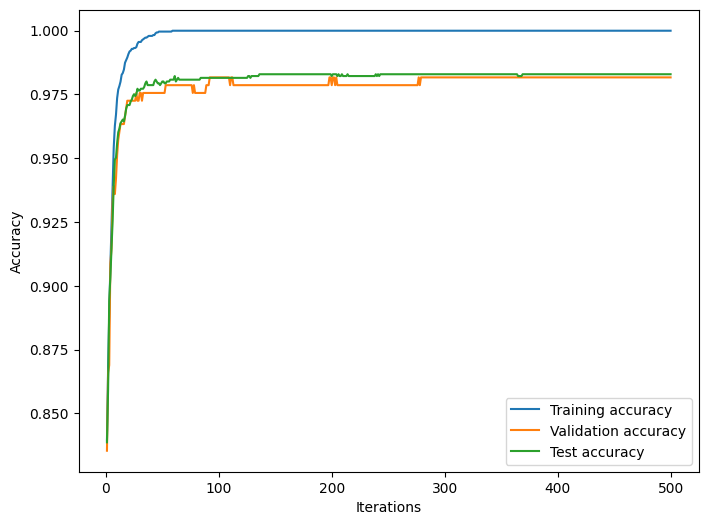

In [125]:
# Initialize lists to store training, validation, and test accuracies
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Train the classifier and calculate accuracies at each iteration
# partial_fit() allows for incremental learning without retraining it from scratch
for i in range(500):
    mlp.partial_fit(X_train_scaled, y_train, classes=np.unique(y_train))
    train_accuracies.append(mlp.score(X_train_scaled, y_train))
    val_accuracies.append(mlp.score(X_val_scaled, y_val))
    test_accuracies.append(mlp.score(X_test_scaled, y_test))

# Plot the training, validation, and test accuracies
plt.figure(figsize=(8, 6))
plt.plot(range(1, 501), train_accuracies, label='Training accuracy')
plt.plot(range(1, 501), val_accuracies, label='Validation accuracy')
plt.plot(range(1, 501), test_accuracies, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


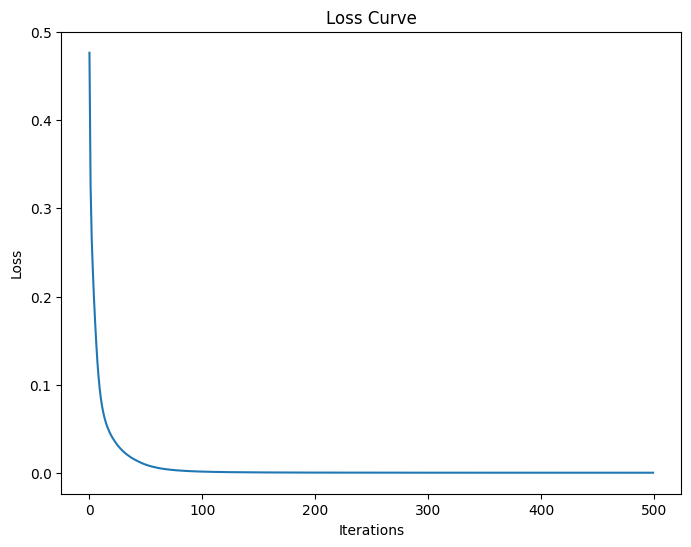

In [126]:
#Displaying the loss curve
plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

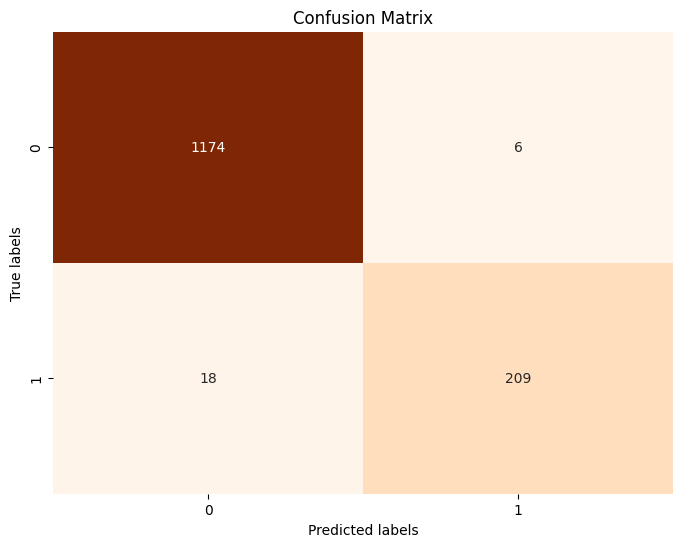

In [130]:
#@title Display the confusion matrix for the test set
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the predicted labels for the test set
y_pred = mlp.predict(X_test_scaled)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

#Summary

As we can see we initially dropped 'Equinox', 'Orbit Determination Date', 'Orbiting Body', 'Neo Reference ID', 'Name', 'Epoch Date Close Approach', 'Close Approach Date' from our predictor variables being that they were not useful predictors to determine if an astroid was hazardous or not. We then trained the model initially with 2 hidden layers with 100 and 50 neurons over 500 iterations. We tweaked the hyperparameters to go with a final model of 2 hidden layers with 150 neurons and 50 neurons. We then obtained a test accuracy of 98%!

#Extra credit

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define the path to your dataset directory
dataset_dir = '/content/drive/MyDrive/Colab Notebooks/RSSCN7-master'

# Define the target image size and batch size
target_size = (224, 224)  # adjust the size as needed
batch_size = 32

# Create image data generators for training, validation, and test sets
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)




Found 1960 images belonging to 7 classes.
Found 840 images belonging to 7 classes.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 output classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

Epoch 1/5
61/61 [==============================] - 355s 6s/step - loss: 1.5708 - accuracy: 0.3143 - val_loss: 1.3506 - val_accuracy: 0.4531
Epoch 2/5
61/61 [==============================] - 292s 5s/step - loss: 1.1464 - accuracy: 0.4684 - val_loss: 1.1919 - val_accuracy: 0.4796
Epoch 3/5
61/61 [==============================] - 271s 4s/step - loss: 0.9564 - accuracy: 0.5726 - val_loss: 1.1063 - val_accuracy: 0.5228
Epoch 4/5
61/61 [==============================] - 281s 5s/step - loss: 0.8659 - accuracy: 0.6333 - val_loss: 1.2026 - val_accuracy: 0.5709
Epoch 5/5
61/61 [==============================] - 274s 4s/step - loss: 0.7693 - accuracy: 0.6857 - val_loss: 1.4242 - val_accuracy: 0.5156
27/27 - 33s - loss: 1.4250 - accuracy: 0.5167 - 33s/epoch - 1s/step
Test Accuracy: 0.5166666507720947


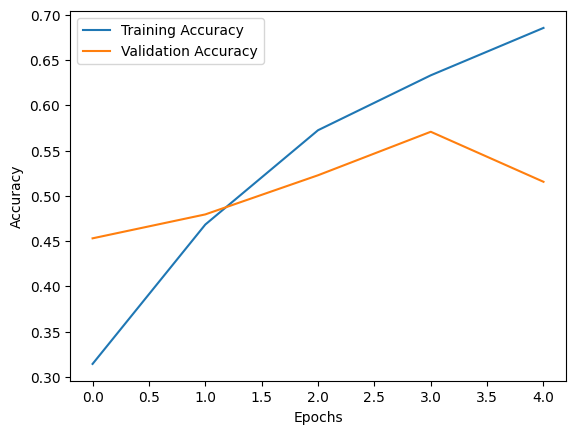

In [5]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(validation_generator, verbose=2)
print("Test Accuracy:", test_accuracy)

# Plot training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [6]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Predict classes for the test set
predictions = np.argmax(model.predict(validation_generator), axis=-1)
true_labels = validation_generator.classes

# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(true_labels, predictions)
print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(classification_report(true_labels, predictions))


27/27 [==============================] - 39s 1s/step
Confusion Matrix:
[[ 4  7 35 19 33 12 10]
 [ 3 14 31 21 26  9 16]
 [ 6  4 33 19 30 17 11]
 [ 4 10 37 24 26  8 11]
 [ 5  8 30 19 29 19 10]
 [ 6  7 36 24 23 15  9]
 [ 1 16 39 19 25 13  7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.03      0.05       120
           1       0.21      0.12      0.15       120
           2       0.14      0.28      0.18       120
           3       0.17      0.20      0.18       120
           4       0.15      0.24      0.19       120
           5       0.16      0.12      0.14       120
           6       0.09      0.06      0.07       120

    accuracy                           0.15       840
   macro avg       0.15      0.15      0.14       840
weighted avg       0.15      0.15      0.14       840



#Summary

The provided model is a Convolutional Neural Network (CNN) architecture designed for image classification tasks. It consists of multiple layers arranged sequentially to process input images and classify them into one of the seven classes.

The model begins with a Conv2D layer, which convolves the input image with 32 filters of size 3x3, resulting in an output shape of (222, 222, 32). This is followed by a MaxPooling2D layer, which reduces the spatial dimensions by half, resulting in an output shape of (111, 111, 32).

Subsequent layers include additional pairs of Conv2D and MaxPooling2D layers, progressively increasing the number of filters and reducing the spatial dimensions. The convolutional layers extract features from the input images, while the max pooling layers downsample the feature maps to capture the most important information.

After several convolutional and pooling layers, the model includes a Flatten layer, which flattens the 3D feature maps into a 1D vector. This vector is then passed to a series of Dense layers, which are fully connected neural network layers. These layers learn to classify the flattened features extracted by the convolutional layers into the appropriate classes.

To prevent overfitting, the model includes a Dropout layer, which randomly sets a fraction of input units to zero during training. This helps regularize the model and improve its generalization performance.

Finally, the output layer consists of a Dense layer with softmax activation, producing probabilities for each class. The class with the highest probability is predicted as the output class for a given input image.



The model didn't preform the best with only a 52% test accuracy